# UIDAI Data Hackathon 2026  
## Interactive Demo: Aadhaar Service Stress Model

This notebook demonstrates an interactive, explainable working model that
identifies districts experiencing high Aadhaar service stress based on
enrolment, biometric updates, and demographic updates.

Users can select a State and District to view the corresponding
service stress score and priority classification.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

In [3]:
model_df = pd.read_csv(
    "/Users/aaronrao/Desktop/projects/UIDAI_Aadhaar_Data_Insights/outputs/tables/aadhaar_service_stress_model_output.csv"
)

# Basic cleanup (safety)
model_df = model_df[
    model_df["state"].str.contains(r"[A-Za-z]", regex=True)
].copy()

model_df.head()

,state,district,total_enrolments,total_biometric_updates,total_demographic_updates,biometric_update_ratio,demographic_update_ratio,service_stress_score,stress_category
1,Andaman & Nicobar Islands,Andamans,75.0,2015.0,750.0,26.866667,10.000000,18.433333,Very High (Priority Intervention)
2,Andaman & Nicobar Islands,Nicobars,1.0,2.0,4.0,2.000000,4.000000,3.000000,Very High (Priority Intervention)
3,Andaman & Nicobar Islands,South Andaman,38.0,367.0,305.0,9.657895,8.026316,8.842105,Very High (Priority Intervention)
4,Andaman And Nicobar Islands,Nicobar,75.0,1811.0,787.0,24.146667,10.493333,17.320000,Very High (Priority Intervention)
5,Andaman And Nicobar Islands,North And Middle Andaman,132.0,6383.0,2009.0,48.356061,15.219697,31.787879,Very High (Priority Intervention)


In [4]:
state_dropdown = widgets.Dropdown(
    options=sorted(model_df["state"].unique()),
    description="State:",
    layout=widgets.Layout(width="400px")
)

district_dropdown = widgets.Dropdown(
    description="District:",
    layout=widgets.Layout(width="400px")
)

In [5]:
def update_districts(*args):
    selected_state = state_dropdown.value
    districts = sorted(
        model_df[model_df["state"] == selected_state]["district"].unique()
    )
    district_dropdown.options = districts
    if districts:
        district_dropdown.value = districts[0]

state_dropdown.observe(update_districts, names="value")

# Initialize districts
update_districts()

In [6]:
def display_results(*args):
    clear_output(wait=True)
    display(state_dropdown, district_dropdown)

    selected_state = state_dropdown.value
    selected_district = district_dropdown.value

    row = model_df[
        (model_df["state"] == selected_state) &
        (model_df["district"] == selected_district)
    ].iloc[0]

    print(f"State: {row['state']}")
    print(f"District: {row['district']}")
    print(f"Total Enrolments: {int(row['total_enrolments']):,}")
    print(f"Biometric Updates: {int(row['total_biometric_updates']):,}")
    print(f"Demographic Updates: {int(row['total_demographic_updates']):,}")
    print(f"Service Stress Score: {row['service_stress_score']:.2f}")
    print(f"Category: {row['stress_category']}")

    # Visual Indicator
    plt.figure(figsize=(7, 1.8))
    plt.barh(
        ["Service Stress"],
        [row["service_stress_score"]],
        color="red"
    )

    plt.xlim(0, model_df["service_stress_score"].max())
    plt.title("Aadhaar Service Stress Indicator")
    plt.show()

Dropdown(description='State:', layout=Layout(width='400px'), options=('Andaman & Nicobar Islands', 'Andaman An…

Dropdown(description='District:', layout=Layout(width='400px'), options=('Andamans', 'Nicobars', 'South Andama…

State: Andaman & Nicobar Islands
District: Andamans
Total Enrolments: 75
Biometric Updates: 2,015
Demographic Updates: 750
Service Stress Score: 18.43
Category: Very High (Priority Intervention)


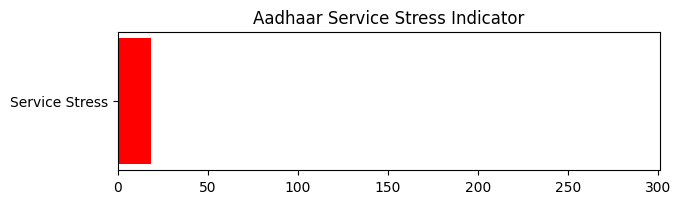

In [7]:
state_dropdown.observe(display_results, names="value")
district_dropdown.observe(display_results, names="value")

display(state_dropdown, district_dropdown)
display_results()